<a href="https://colab.research.google.com/github/stevengregori92/Pytorch-Intro/blob/main/Neural_Network_with_PyTorch_(Dropout)_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install jcopdl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import jcopdl, luwiji

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [ ]:
import torch
from torch import nn, optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

#Import Data

In [ ]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


,missing_value,%
Pregnancies,0,0.00
Glucose,5,0.65
BloodPressure,35,4.56
SkinThickness,227,29.56
Insulin,374,48.70
BMI,11,1.43
DiabetesPedigreeFunction,0,0.00
Age,0,0.00
Outcome,0,0.00


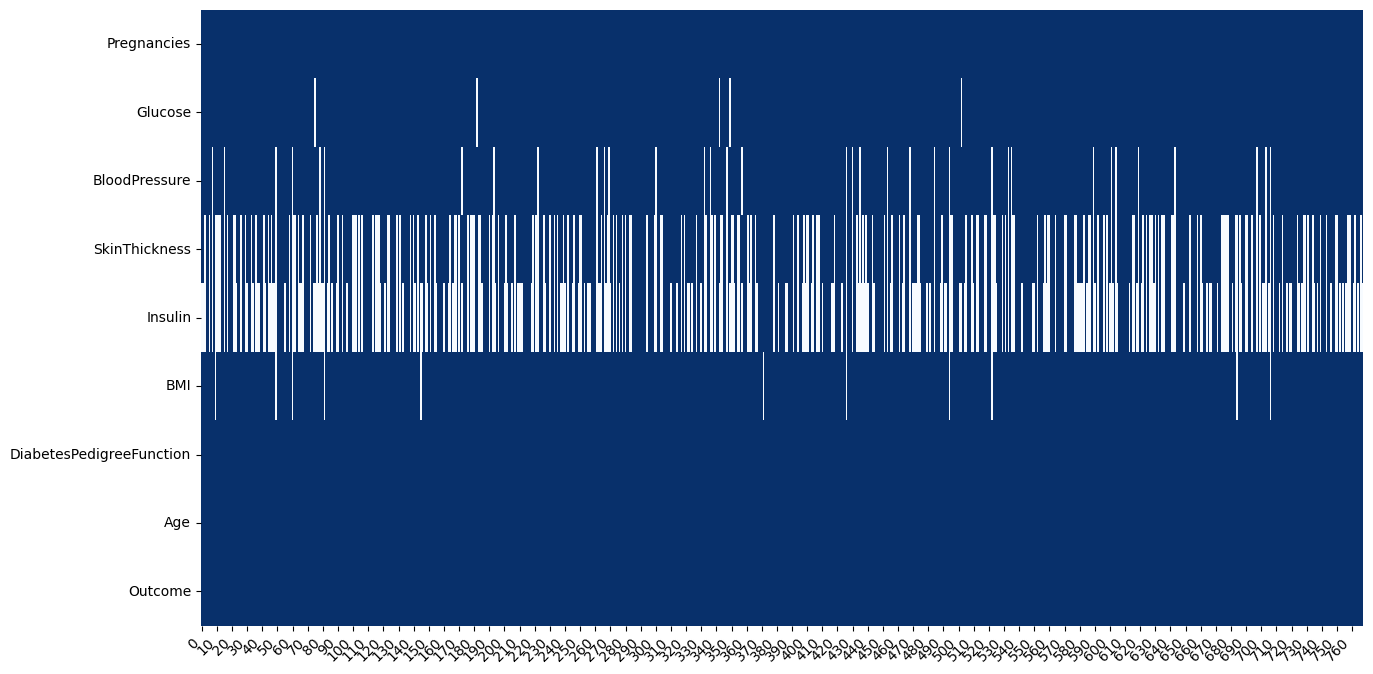

In [ ]:
plot_missing_value(data, return_df=True)

In [ ]:
data.drop(columns='Insulin', inplace=True)

In [ ]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#Dataset Splitting

In [ ]:
X = data.drop(columns=['Outcome'])
y = data.Outcome.values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614,), (154,))

#Preprocess Data

In [ ]:
from xgboost import XGBClassifier

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
X_train

array([[1.00e+00, 9.00e+01, 6.20e+01, ..., 2.72e+01, 5.80e-01, 2.40e+01],
       [5.00e+00, 1.26e+02, 7.80e+01, ..., 2.96e+01, 4.39e-01, 4.00e+01],
       [2.00e+00, 1.05e+02, 5.80e+01, ..., 3.49e+01, 2.25e-01, 2.50e+01],
       ...,
       [1.00e+00, 9.70e+01, 7.00e+01, ..., 3.81e+01, 2.18e-01, 3.00e+01],
       [1.00e+01, 1.11e+02, 7.00e+01, ..., 2.75e+01, 1.41e-01, 4.00e+01],
       [4.00e+00, 1.44e+02, 5.80e+01, ..., 2.95e+01, 2.87e-01, 3.70e+01]])

#Dataset & Dataloader

In [ ]:
X_train = torch.FloatTensor(X_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test).to(device)

In [ ]:
y_test

tensor([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=64, shuffle=True)

test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=64)

#Mengurangi Overfit dengan Dropout

In [ ]:
from luwiji.neural_network import illustration

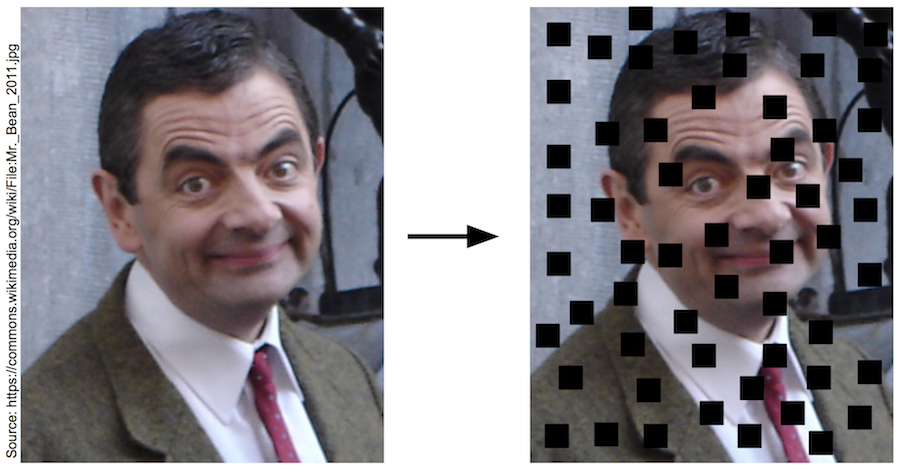

In [ ]:
illustration.dropout_idea

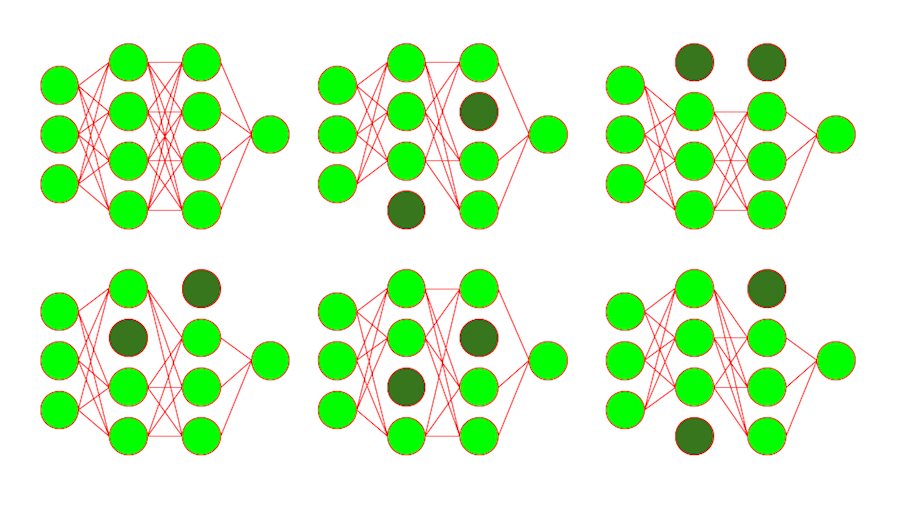

In [ ]:
illustration.dropout

In [ ]:
model = nn.Sequential(
    nn.Linear(7, 16),
    nn.ReLU(),
    nn.Dropout(0.25),

    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Dropout(0.25),

    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(8, 2),
    nn.LogSoftmax(1)
).to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == 'train':
        model.train()
    elif mode == 'test':
        model.eval()
    cost = correct = 0
    for feature, target in dataloader:
        feature, target = feature.to(device), target.to(device) # corrected line
        output = model(feature)
        loss = criterion(output, target)

        if mode == 'train':
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
        
    cost = cost/len(dataset)
    acc = correct/len(dataset)
    return cost, acc

In [ ]:
epochs=1000
train_cost, test_cost = [], []
train_acc, test_acc = [], []
for i in range(epochs):
  cost, acc = loop_fn('train', train_set, trainloader, model, criterion, optimizer, device)
  train_cost.append(cost)
  train_acc.append(acc)
  with torch.no_grad():
      cost, acc = loop_fn('test', test_set, testloader, model, criterion, optimizer, device)
      test_cost.append(cost)
      test_acc.append(acc)

  print(f"\rEpoch: {i+1:4}/{epochs:4} | train_cost: {train_cost[-1]:.4f} | test_cost: {test_cost[-1]:.4f} | "
        f"train_acc: {train_acc[-1]:.4f} | test_acc: {test_acc[-1]:.4f}", end=" ")

Epoch: 1000/1000 | train_cost: 0.4938 | test_cost: 0.7763 | train_acc: 0.7492 | test_acc: 0.6623 

In [ ]:
import matplotlib.pyplot as plt

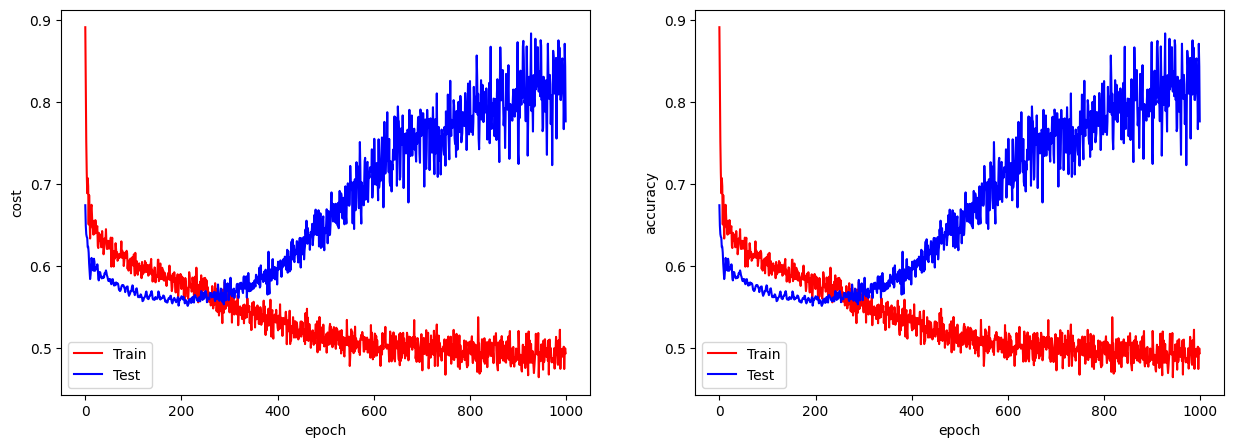

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(train_cost, 'r-', label='Train')
plt.plot(test_cost, 'b-', label ='Test')
plt.xlabel('epoch'); plt.ylabel('cost'); plt.legend()

plt.subplot(122)
plt.plot(train_cost, 'r-', label='Train')
plt.plot(test_cost, 'b-', label ='Test')
plt.xlabel('epoch'); plt.ylabel('accuracy'); plt.legend()

#Save ~~Model~~ Weights

In [ ]:
import os
os.makedirs('model', exist_ok=True)

In [ ]:
torch.save(model.state_dict(), 'model/weights.pth')

In [ ]:
log = {
    'train_cost': train_cost,
    'test_cost': test_cost,
    'train_acc': train_acc,
    'test_acc': test_acc
}
torch.save(log, 'model/logs.pth')

#Load Model

In [ ]:
model = nn.Sequential(
    nn.Linear(7, 16),
    nn.ReLU(),
    nn.Dropout(0.25),

    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Dropout(0.25),

    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(8, 2),
    nn.LogSoftmax(1)
)

In [ ]:
weights = torch.load('model/weights.pth', map_location = 'cpu')

#Accuracy

In [ ]:
model.load_state_dict(weights)
model = model.to(device)

In [ ]:
with torch.no_grad():
  model.eval()
  output = model(X_test)
  pred = output.argmax(1)
  acc = (y_test == pred).to(torch.float32).mean()

acc

tensor(0.6623)